## LAB Tasks


Runthe 2nd iteration of the model, adding the categorial data

In [1]:
import pandas as pd

url="/Users/miriamg/Documents/GitHub_Ironhack/Week 4 Machine learning/Last_marketing_customer_analysis_clean.csv"
df = pd.read_csv(url)
df#.info()

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [2]:
df.columns

Index(['unnamed:_0', 'customer', 'state', 'customer_lifetime_value',
       'response', 'coverage', 'education', 'effective_to_date',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'total_claim_amount', 'vehicle_class', 'vehicle_size',
       'vehicle_type', 'month'],
      dtype='object')

In [3]:
categoric_df = df.select_dtypes(include = 'object')


In [4]:
numeric_df = df.select_dtypes(include ='number')
numeric_df

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [5]:
#Define which variable could be the one with large range, in this case income so is my vA

column_ranges = numeric_df.describe().loc[['min', 'max']]

print(column_ranges)

     unnamed:_0  customer_lifetime_value   income  monthly_premium_auto  \
min         0.0              1898.007675      0.0                  61.0   
max     10909.0             83325.381190  99981.0                 298.0   

     months_since_last_claim  months_since_policy_inception  \
min                      0.0                            0.0   
max                     35.0                           99.0   

     number_of_open_complaints  number_of_policies  total_claim_amount  month  
min                        0.0                 1.0            0.099007    1.0  
max                        5.0                 9.0         2893.239678    2.0  


In [6]:
categoric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer           10910 non-null  object
 1   state              10910 non-null  object
 2   response           10910 non-null  object
 3   coverage           10910 non-null  object
 4   education          10910 non-null  object
 5   effective_to_date  10910 non-null  object
 6   employmentstatus   10910 non-null  object
 7   gender             10910 non-null  object
 8   location_code      10910 non-null  object
 9   marital_status     10910 non-null  object
 10  policy_type        10910 non-null  object
 11  policy             10910 non-null  object
 12  renew_offer_type   10910 non-null  object
 13  sales_channel      10910 non-null  object
 14  vehicle_class      10910 non-null  object
 15  vehicle_size       10910 non-null  object
 16  vehicle_type       10910 non-null  objec

In [7]:
categoric_df.coverage.unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [8]:
categoric_df.education.unique()

array(['College', 'Bachelor', 'High School or Below', 'Doctor', 'Master'],
      dtype=object)

In [9]:
categoric_df.vehicle_size.unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [10]:
cov_df=categoric_df["coverage"].map({'Basic': 1, 'Extended': 2, 'Premium': 3})
cov_df

0        1
1        1
2        1
3        2
4        3
        ..
10905    3
10906    1
10907    2
10908    3
10909    1
Name: coverage, Length: 10910, dtype: int64

In [11]:
edu_df= categoric_df["education"].map({'High School or Below': 1 ,'College': 2, 'Bachelor': 3, 'Master': 4 , 'Doctor': 5 })
edu_df

0        2
1        2
2        3
3        2
4        3
        ..
10905    3
10906    2
10907    3
10908    2
10909    3
Name: education, Length: 10910, dtype: int64

In [12]:
vsize_df= categoric_df["vehicle_size"].map({'Small': 1, 'Medsize': 2, 'Large': 3})
vsize_df

0        2
1        2
2        2
3        2
4        2
        ..
10905    2
10906    2
10907    2
10908    2
10909    2
Name: vehicle_size, Length: 10910, dtype: int64

In [13]:
categorical_nominals_df = pd.get_dummies(categoric_df[[
    'state',
       'employmentstatus', 'gender', 'location_code',
       'marital_status', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_type']], dtype= int)

categorical_nominals_df

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,1
10906,0,0,0,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
10907,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
10908,0,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,1


In [30]:
categorical_nominals_df.isnull().sum()

state_Arizona                     0
state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
employmentstatus_Disabled         0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_F                          0
gender_M                          0
location_code_Rural               0
location_code_Suburban            0
location_code_Urban               0
marital_status_Divorced           0
marital_status_Married            0
marital_status_Single             0
policy_type_Corporate Auto        0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Corporate L1               0
policy_Corporate L2               0
policy_Corporate L3               0
policy_Personal L1                0
policy_Personal L2                0
policy_Personal L3                0
policy_Special L1           

In [32]:
categorical_df_ttbomk= pd.concat([cov_df, edu_df, vsize_df, categorical_nominals_df], axis=1)

categorical_df_ttbomk

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,1,2,2,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,2,2,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,1,3,2,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,2,2,2,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,3,3,2,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,3,3,2,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,1,2,2,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
10907,2,3,2,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
10908,3,2,2,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [57]:
complete_df = pd.concat([categorical_df_ttbomk, numeric_df],axis=1)

In [58]:
complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   coverage                        10910 non-null  int64  
 1   education                       10910 non-null  int64  
 2   vehicle_size                    10910 non-null  int64  
 3   state_Arizona                   10910 non-null  int64  
 4   state_California                10910 non-null  int64  
 5   state_Nevada                    10910 non-null  int64  
 6   state_Oregon                    10910 non-null  int64  
 7   state_Washington                10910 non-null  int64  
 8   employmentstatus_Disabled       10910 non-null  int64  
 9   employmentstatus_Employed       10910 non-null  int64  
 10  employmentstatus_Medical Leave  10910 non-null  int64  
 11  employmentstatus_Retired        10910 non-null  int64  
 12  employmentstatus_Unemployed     

In [59]:
"""from sklearn.preprocessing import OrdinalEncoder# pass the order I want( Try this if I want)

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit and transform the data
for column in ["coverage", "vehicle_size"]:
    categoric_df[column]= encoder.fit_transform(categoric_df[column])
    
print(categoric_df[column])"""

'from sklearn.preprocessing import OrdinalEncoder# pass the order I want( Try this if I want)\n\n# Create an instance of the OrdinalEncoder\nencoder = OrdinalEncoder()\n\n# Fit and transform the data\nfor column in ["coverage", "vehicle_size"]:\n    categoric_df[column]= encoder.fit_transform(categoric_df[column])\n    \nprint(categoric_df[column])'

In [60]:
import pandas as pd
import seaborn as sns

## X-y split

In [61]:
X = complete_df.drop(columns=['total_claim_amount'])
y = complete_df[['total_claim_amount']]

## Train-test split

In [293]:
from sklearn.model_selection import train_test_split

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, random_state=42)

In [325]:
y_test.shape #Why is this happening?


(2728, 1)

In [326]:
y_test

,total_claim_amount
4829,475.423848
5081,350.400000
5011,482.400000
4625,673.342650
3838,302.400000
...,...
7450,460.266881
4715,405.883346
8581,41.182611
211,364.800000


## Standardize the data. PowerTransformer

In [298]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [299]:
pt = PowerTransformer()

In [300]:
pt.fit(X_train)
X_train= pt.transform(X_train)
X_train

/Users/miriamg/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[-0.79197819, -0.12033866, -1.7222091 , ..., -0.57987317,
        -0.06206636,  1.07649387],
       [-0.79197819, -1.32766647,  0.14170554, ..., -0.57987317,
         0.51680123, -0.92894166],
       [-0.79197819, -0.12033866,  0.14170554, ..., -0.57987317,
        -1.1467141 ,  1.07649387],
       ...,
       [-0.79197819, -0.12033866,  0.14170554, ..., -0.57987317,
        -0.06206636,  1.07649387],
       [-0.79197819, -1.32766647,  0.14170554, ..., -0.57987317,
         0.51680123,  1.07649387],
       [-0.79197819, -1.32766647,  0.14170554, ..., -0.57987317,
        -0.06206636,  1.07649387]])

In [301]:
X_test = pt.transform (X_test)
X_test

array([[-0.79197819,  0.75180064, -1.7222091 , ..., -0.57987317,
         0.51680123,  1.07649387],
       [-0.79197819, -1.32766647, -1.7222091 , ...,  1.24086041,
        -1.1467141 , -0.92894166],
       [-0.79197819, -1.32766647,  0.14170554, ...,  1.89908674,
        -1.1467141 ,  1.07649387],
       ...,
       [ 1.14431765,  0.75180064, -1.7222091 , ..., -0.57987317,
        -1.1467141 , -0.92894166],
       [ 1.14431765, -0.12033866, -1.7222091 , ..., -0.57987317,
        -0.06206636, -0.92894166],
       [-0.79197819,  0.75180064,  2.12763208, ..., -0.57987317,
         0.51680123, -0.92894166]])

In [302]:
pt.fit(y_train)

PowerTransformer()

In [303]:
y_train = pt.transform(y_train)
y_train

array([[ 1.46717679],
       [ 0.41369518],
       [ 0.53162556],
       ...,
       [-0.19545373],
       [-0.17645893],
       [ 0.5618442 ]])

In [304]:
y_test= pt.transform(y_train)

In [305]:
X_train= pd.DataFrame(X_train)
X_test= pd.DataFrame(X_test)
y_test= pd.DataFrame(y_test)
y_train= pd.DataFrame(y_train)



In [327]:
y_test.shape

(2728, 1)

## Applying linear regression

In [328]:
from sklearn.linear_model import LinearRegression

In [329]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [330]:
model.coef_

array([[-8.18244504e+00, -5.11011101e+00, -8.16705354e-01,
        -4.49060669e+00,  1.40989092e+00,  2.76564267e+00,
        -5.03505547e+00,  5.35012857e+00, -5.56534146e+00,
        -1.53148327e+01, -1.18569702e+00, -3.11416854e+01,
         5.32075566e+01, -8.53421570e+00,  8.53421570e+00,
        -2.02412631e+02,  1.79529064e+02,  2.28835670e+01,
        -2.16867786e+01, -2.36558810e+01,  4.53426596e+01,
        -6.40335102e+00, -4.11153226e+00,  1.05148833e+01,
        -7.18577660e+00,  6.53301580e-01,  1.29124004e-01,
         2.19267213e+00, -3.86139560e+00, -2.44280879e+00,
         2.83805285e+01, -7.51829295e+00, -1.03473523e+01,
        -8.64313466e+00,  5.50098259e+00,  5.86552249e+00,
        -2.72337042e+00, -5.11180070e-01, -8.83893607e-01,
         5.76698886e-02,  1.33740379e+00,  4.00670028e+00,
         2.22152563e+01,  4.52314776e+00, -1.38965835e+01,
        -2.28693823e+01,  6.02086143e+00,  0.00000000e+00,
         4.56045868e-04, -1.41478452e-04, -2.91227834e-0

In [331]:
model.intercept_

array([-95.96770322])

## Predict the total_claim_amount

In [311]:
random_customer = X_test.sample()


In [332]:
y_test.shape

(2728, 1)

In [313]:
random_customer

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
2700,-0.791978,2.003315,0.141706,2.161049,-0.78224,-0.314865,-0.60776,-0.302996,-0.221909,0.782443,...,0.0,-0.076251,-0.045029,0.625723,-0.69962,1.449227,-0.546422,-0.579873,1.133271,-0.928942


In [314]:
model.predict(random_customer)

array([[-1.74933437]])

In [315]:
#Inverse transform
pt.inverse_transform(model.predict(random_customer))

array([[60.31583838]])

## Create predictions for the test set

In [333]:
y_pred = model.predict(X_test)

In [334]:
y_pred= pd.DataFrame(y_pred) #SOMETHING IS HAPPENING

In [335]:
#Why?
#y_test = y_test.reset_index(drop = True)

In [336]:
y_test.shape

(2728, 1)

In [337]:
residuals_df = pd.concat([y_test, y_pred], axis=1)
residuals_df.columns = ["y_test", "y_pred"]
residuals_df

,y_test,y_pred
4829,475.423848,NaN
5081,350.400000,NaN
5011,482.400000,NaN
4625,673.342650,NaN
3838,302.400000,NaN
...,...,...
2722,NaN,533.454063
2723,NaN,549.264125
2725,NaN,16.958890
2726,NaN,493.157228


In [267]:
y_pred.shape

(2728, 1)

In [269]:
y_test.shape

(8182, 1)

In [216]:
residuals_df= residuals_df.rename(columns= {"total_claim_amount": "y_test", 0: "y_pred"})

In [217]:
residuals_df

,y_test,y_pred
0,-3.289242,-4.642370e+12
1,-3.302544,-4.152015e+12
2,-3.300824,-5.444839e+12
3,-3.299596,-4.340776e+12
4,-3.302544,-4.701887e+12
...,...,...
8177,-3.292501,NaN
8178,-3.304195,NaN
8179,-3.313032,NaN
8180,-3.312654,NaN


In [218]:
residuals_df["residual"] = residuals_df["y_test"]- residuals_df["y_pred"]

In [219]:
residuals_df.head()

,y_test,y_pred,residual
0,-3.289242,-4.642370e+12,4.642370e+12
1,-3.302544,-4.152015e+12,4.152015e+12
2,-3.300824,-5.444839e+12,5.444839e+12
3,-3.299596,-4.340776e+12,4.340776e+12
4,-3.302544,-4.701887e+12,4.701887e+12


## Calculating metrics

In [237]:
mean_error = residuals_df["residual"].mean()
mean_error

4366339732505.18

In [238]:
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error as mae

In [239]:
mse(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8182, 2728]

In [224]:
mae(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8182, 2728]

In [225]:
rmse= mse( y_test, y_pred, squared = False)
rmse

ValueError: Found input variables with inconsistent numbers of samples: [8182, 2728]

## Computing R2_score for train_set

In [226]:
from sklearn.metrics import r2_score

In [227]:
r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [8182, 2728]

## Computing R2_score for train_set

In [228]:
y_pred_train = pd.DataFrame(model.predict(X_train))

In [229]:
round(r2_score(y_train, y_pred_train),2)

0.82

## Feature importance plot

In [230]:
feature_names = list(X_train.columns)

In [231]:
coefficients = model.coef_

In [232]:
coefficients = [i for i in coefficients[0]]

In [233]:
fi = {"name": feature_names, "coeff": coefficients}
fi_df = pd.DataFrame(fi)

fi_df

,name,coeff
0,0,1.676056e-03
1,1,-4.262757e-04
2,2,-1.959380e-03
3,3,-2.223939e+11
4,4,-2.831740e+11
5,5,-1.671565e+11
6,6,-2.589775e+11
7,7,-1.619358e+11
8,8,3.072936e+11
9,9,7.051556e+11


<Figure size 720x864 with 0 Axes>

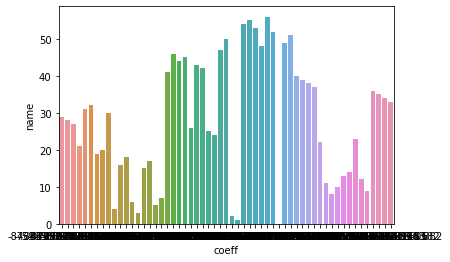

<Figure size 720x864 with 0 Axes>

In [236]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(y= fi_df['name'], x = fi_df['coeff'])

fi_df = fi_df.sort_values(by='coeff', ascending=False)
plt.figure(figsize=(10,12))

sns.barplot(y= fi_df['name'], x = fi_df['coeff'])
import seaborn as sns
import matplotlib.pyplot as plt